In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import interpolatespectra
from scipy import interpolate

## If your interpolated spectra has unneccessary additions to its calibration spectra; take note because you need to still identify these false negatives. Later, you will need to remove the false negatives from the dataset. 

### Make sure to look at peakidentify and chemical reactions to note unnecessary additions to your calibration spectra before continuing to the machine learning

In [2]:
dataprep.new_hdf5('supervised_calibration_dataset')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
dataprep.add_calibration('supervised_calibration_dataset.hdf5','../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx',label='FormicAcid')


Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model.
     Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model.
     Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model.
     Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx fit with compound pseudo-Voigt model.
     Results saved to supervised_calibration_dataset.hdf5.


In [3]:
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'propane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'ethane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'acetaldehyde')

Data from ../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Propane_test.xlsx fit with compound pseudo-Voigt model.
     Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Ethane_test.xlsx fit with compound pseudo-Voigt model.
     Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx fit with compound pseudo-Voigt model.
     Results saved to supervised_calibration_dataset.hdf5.


In [4]:
dataprep.view_hdf5('supervised_calibration_dataset.hdf5')

**** supervised_calibration_dataset.hdf5 ****
FormicAcid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    counts
|    residuals
|    wavenumber
acetaldehyde
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    counts
|    residuals
|    wavenumber
carbon dioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
carbon monoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
methane
|    Peak_01
|    counts
|    residuals
|    wavenumber
propane
|    Peak_01
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
water
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber


# Interpolated calibration dataset

In [5]:
# dataprep.new_hdf5('supervised_calibration_interp')

In [6]:
dataprep.view_hdf5('../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5')

**** ../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5 ****
interp_FormicAcid
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    1
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    10
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|   

|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    34
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    35
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|   

|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    54
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    55
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    56
|    |    

|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    21
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    22
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|   

|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    43
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    44
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    45
|    |    Peak_01
|    |    

|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    10
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    11
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|   

|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    counts
|    |    residuals
|    |    wavenumber
|    30
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    counts
|    |    residuals
|    |    wavenumber
|    31
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|   

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    50
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    51
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|   

|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    Peak_24
|    |    counts
|    |    residuals
|    |    wavenumber
|    2
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    20
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    

|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    38
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    39
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|  

|    |    counts
|    |    residuals
|    |    wavenumber
|    55
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    56
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    57
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    

|    21
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    22
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    23
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    44
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    45
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|   

|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    11
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    12
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|   

|    |    residuals
|    |    wavenumber
|    29
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    3
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    30
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    50
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    51
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|   

|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    13
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    14
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    32
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    33
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    34
|    |    

|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    50
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    Peak_24
|    |    counts
|    |    residuals
|    |    wavenumber
|    51
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|   

|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    13
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    counts
|    |    residuals
|    |    wavenumber
|    14
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|   

|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    30
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    31
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|   

|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    47
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    Peak_24
|    |    counts
|    |    residuals
|    |    wavenumber
|    48
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    49
|    |    

|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    10
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    11
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    12
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    

|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    31
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    32
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    

|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    53
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    54
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|   

|    21
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    22
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    23
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak

|    41
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    42
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    43
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak

|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    7
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    8
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |

In [7]:
hdf5_interpfilename = '../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5'
# first a function that will return a normalized interpolated spectra
# target_compound = 'water'
# compound = 'water'
hdf5_calfilename = 'supervised_calibration_dataset.hdf5'

In [8]:
# frames = interpspectra.interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count)


In [9]:
# frames

In [10]:
key_list = interpolatespectra.keyfinder(hdf5_interpfilename)
print(key_list)

['interp_FormicAcid/0', 'interp_FormicAcid/1', 'interp_FormicAcid/10', 'interp_FormicAcid/11', 'interp_FormicAcid/12', 'interp_FormicAcid/13', 'interp_FormicAcid/14', 'interp_FormicAcid/15', 'interp_FormicAcid/16', 'interp_FormicAcid/17', 'interp_FormicAcid/18', 'interp_FormicAcid/19', 'interp_FormicAcid/2', 'interp_FormicAcid/20', 'interp_FormicAcid/21', 'interp_FormicAcid/22', 'interp_FormicAcid/23', 'interp_FormicAcid/24', 'interp_FormicAcid/25', 'interp_FormicAcid/26', 'interp_FormicAcid/27', 'interp_FormicAcid/28', 'interp_FormicAcid/29', 'interp_FormicAcid/3', 'interp_FormicAcid/30', 'interp_FormicAcid/31', 'interp_FormicAcid/32', 'interp_FormicAcid/33', 'interp_FormicAcid/34', 'interp_FormicAcid/35', 'interp_FormicAcid/36', 'interp_FormicAcid/37', 'interp_FormicAcid/38', 'interp_FormicAcid/39', 'interp_FormicAcid/4', 'interp_FormicAcid/40', 'interp_FormicAcid/41', 'interp_FormicAcid/42', 'interp_FormicAcid/43', 'interp_FormicAcid/44', 'interp_FormicAcid/45', 'interp_FormicAcid/4

In [11]:
# df = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
#       keys=None, levels=None, names=None, verify_integrity=False,
#       copy=True,sort=True)
# df

# SAVE your hdf5 file before continuing and MAKE COPIES

In [12]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = '../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane a

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 50.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 0.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

{'FormicAcid': 33.33333333333333, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 

{'FormicAcid': 33.33333333333333, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.30424424

{'FormicAcid': 16.666666666666664, 'acetaldehyde': 37.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 75.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
The peaks tha

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 50.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that 

{'FormicAcid': 50.0, 'acetaldehyde': 12.5, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 50.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
Th

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 25.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane a

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 25.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.14

{'FormicAcid': 16.666666666666664, 'acetaldehyde': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we f

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 37.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.304244

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane a

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we f

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 50.0, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 75.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane a

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
The peaks that we found for hydrogen are:

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'ethane': 33.33333333333333, 'hydrogen': 0.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane a

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 25.0, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 50.0, 'carbon monoxide': 0.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we f

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 

{'FormicAcid': 33.33333333333333, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 0.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 0.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

{'FormicAcid': 33.33333333333333, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 0.0, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 37.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0

{'FormicAcid': 83.33333333333334, 'acetaldehyde': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hy

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

{'FormicAcid': 33.33333333333333, 'acetaldehyde': 75.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 0.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 0.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781

{'FormicAcid': 50.0, 'acetaldehyde': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found fo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 75.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The 

{'FormicAcid': 16.666666666666664, 'acetaldehyde': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 75.0, 'methane': 0.0, 'propane': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044


{'FormicAcid': 66.66666666666666, 'acetaldehyde': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydr

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydr

{'FormicAcid': 83.33333333333334, 'acetaldehyde': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 75.0, 'methane': 0.0, 'propane': 100.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.304244244

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 100.0, 'sapphire': 50.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.]

{'FormicAcid': 83.33333333333334, 'acetaldehyde': 37.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 75.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044


{'FormicAcid': 66.66666666666666, 'acetaldehyde': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 75.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0

{'FormicAcid': 100.0, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 75.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.30424424

{'FormicAcid': 50.0, 'acetaldehyde': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 125.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
29

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 37.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 75.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.30424424424

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 37.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'ethane': 33.33333333333333, 'hydrogen': 25.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
The

{'FormicAcid': 50.0, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 0.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 0.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 75.0, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 0.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 37.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane a

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 0.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 75.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 0.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
295

{'FormicAcid': 33.33333333333333, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks t

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0.

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 62.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 66.66666666666666, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.

In [13]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [14]:
cal = pd.DataFrame()

In [15]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
cal['fraction']= result[:][0]
cal['sigma']= result[:][1]
# dat['center']= result[:][2]
cal['amplitude']= result[:][3]
cal['fwhm']= result[:][4]
cal['height']= result[:][5]
cal['auc']= result[:][6]
cal['labelencoded']=le.fit_transform(result[:][7])
cal['labels']= result[:][7]
cal['center']= result[:][2]

In [16]:
row = next(cal.iterrows())
row

(0, fraction            0.718327
 sigma                4.38034
 amplitude            3.24152
 fwhm                 8.76068
 height              0.267115
 auc                   3.2092
 labelencoded               9
 labels          ['hydrogen']
 center                   355
 Name: 0, dtype: object)

In [17]:
calformic = cal.where(cal.labelencoded == 0).dropna()

In [18]:
calformic

,fraction,sigma,amplitude,fwhm,height,auc,labelencoded,labels,center
11,0.33018,49.373,29.4553,98.746,0.250404,29.2404,0.0,"['FormicAcid', 'acetaldehyde']",1405
14,0.917099,9.36614,10.2305,18.7323,0.361396,10.1932,0.0,"['FormicAcid', 'acetaldehyde']",1715
12,1,17.1294,26.6998,34.2587,0.496156,26.4947,0.0,"['FormicAcid', 'acetaldehyde']",1400
13,0.615985,27.706,61.5176,55.412,0.835866,61.0724,0.0,"['FormicAcid', 'acetaldehyde']",1716
14,1,26.6201,45.5737,53.2402,0.544947,45.0297,0.0,"['FormicAcid', 'acetaldehyde']",1401
17,0.547501,22.0575,50.3982,44.115,0.883832,50.1401,0.0,"['FormicAcid', 'acetaldehyde']",1715
14,0.391077,48.9899,28.8441,97.9798,0.241696,28.5967,0.0,"['FormicAcid', 'acetaldehyde']",1405
17,0.942611,9.37733,9.88335,18.7547,0.344645,9.8463,0.0,"['FormicAcid', 'acetaldehyde']",1715
13,1,32.07,65.8519,64.1399,0.653612,64.9049,0.0,"['FormicAcid', 'acetaldehyde']",1401
15,0.996169,21.828,79.7212,43.6559,1.16467,78.9861,0.0,"['FormicAcid', 'acetaldehyde']",1716


# Experimental dataset

In [19]:
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

**** dataimport_ML_df-Copy1.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    75s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
420C
|    10s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    5s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|  

In [20]:
key_list = interpolatespectra.keyfinder('dataimport_ML_df-Copy1.hdf5')
len(key_list)

50

In [21]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' 
hdf5_expfilename = 'dataimport_ML_df-Copy1.hdf5'
frames = []
for _, key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we f

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 12.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydro

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for propane are: 
870.16

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 12.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The pe

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for

In [22]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=key_list, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [23]:
dat = pd.DataFrame()

In [24]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
# dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]
dat['center']= result[:][2]

In [25]:
dat

fraction    sigma amplitude     fwhm   height      auc  \
300C/25s 0   2.66632e-06  9.47784   251.853  18.9557  12.4817  251.852   
         1      0.506813   4.0129   1034.01   8.0258   101.26  1028.59   
         2      0.636782  3.84759   7306.16  7.69519  708.864  7270.35   
         3   2.55231e-05  2.69962   193.734  5.39924  33.7084  193.741   
         4      0.188666  4.21062   1090.47  8.42124   114.25  1089.49   
         5   1.38778e-15  20.4979   6837.15  40.9957  156.677  6837.15   
         6   6.88713e-07  7.19462   3533.44  14.3892  230.689  3533.44   
         7             0  18.0052   1438.24  36.0103  37.5207  1438.24   
         8      0.841161  29.1589   20781.3  58.3177  243.997  20534.1   
         9             1  15.8466   15275.1  31.6932  306.831  15166.6   
         10  1.05175e-05  47.9173   35138.2  95.8346  344.448  35138.2   
         11     0.179058   26.217   25828.1   52.434  436.042  25776.7   
         12            1  3.77176   285.944  7.54351  24.1317  285.521   
         13     0.489606  3.60812   255.955  7.21624  28.0624  255.753   
         14  1.60982e-15  21.9786   3553.09  43.9572  75.9353  3553.09   
         15     0.553011  79.8096   53203.1  159.619  257.309  41554.6   
300C/35s 0      0.493198  3.84136    985.18  7.68271  101.316   980.38   
         1      0.642997  3.81059   7232.34  7.62118   706.73  7196.91   
         2   1.07692e-14  2.61594   150.018  5.23189  26.9372  150.027   
         3      0.490083  4.12695   1229.31   8.2539  117.814  1226.57   
         4      0.966028  4.26157     205.6  8.52315  15.6051  204.764   
         5   1.11022e-15  20.5743   7441.88  41.1487    169.9  7441.88   
         6   5.93652e-09  7.11561   3457.79  14.2312  228.257   3457.8   
         7             0  18.2118   1501.97  36.4236  38.7388  1501.97   
         8      0.799162  29.0338   21598.4  58.0676  259.413  21355.3   
         9             1  15.7745   16283.5  31.5491   328.58  16168.3   
         10   4.7038e-08  52.5427   37279.7  105.085  333.271  37279.7   
         11     0.177272  26.9016     26193  53.8033  431.212  26140.1   
         12     0.982646  4.00883   532.343  8.01767  42.6181  531.501   
         13  2.80814e-11  3.97073   209.439  7.94147  24.7756  209.423   
...                  ...      ...       ...      ...      ...      ...   
430C/6s  9             1  7.69256   23660.9  15.3851  979.063    23579   
         10  1.11022e-15  50.4553   24675.3  100.911  229.717  24675.3   
         11     0.738487  4.16778   1014.36  8.33557  87.1077  1012.98   
         12     0.520028  93.2303   51105.6  186.461  214.322  38134.3   
430C/7s  0      0.541635  4.39474    7253.4  8.78947  639.906  7198.61   
         1      0.292955  4.04618   570.694  8.09236  59.9954  568.957   
         2      0.619249  3.88885   7308.87   7.7777  706.593  7273.64   
         3   0.000684137  2.73452    234.62  5.46903  40.2928  234.626   
         4       0.63861  4.54011   20832.2  9.08021  1711.63    20768   
         5   4.31266e-13  7.67625   4139.49  15.3525    253.3  4139.49   
         6      0.526453  3.84262   3004.72  7.68524  304.965  3000.67   
         7      0.965685  3.62261    2844.6  7.24521  254.028  2838.81   
         8             1  19.8439   16227.4  39.6878  260.298  16076.3   
         9      0.995222  7.75562   22412.3  15.5112  921.948  22334.5   
         10    0.0305331  48.4932   22094.1  96.9864  211.904  22080.2   
         11      0.88652  4.04306   1008.46  8.08611  83.6815  1006.87   
         12     0.511043  90.3349   45211.9   180.67  196.364  34067.6   
430C/8s  0      0.462596  4.42038   7438.08  8.84075   672.53  7389.79   
         1      0.855428  3.64003   677.076  7.28006    63.28  671.659   
         2      0.550579    3.868   7051.84    7.736  704.375  7021.79   
         3   2.22045e-16  2.70972   227.851  5.41944   39.497  227.858   
         4      0.642756  4.52327   22176.1  9.04653  1825.75  22107.6   
         5   1.86242

In [26]:
datformic = dat.where(dat.labelencoded == int(0)).dropna()

In [27]:
datformic

fraction    sigma amplitude     fwhm   height      auc  \
300C/25s 9             1  15.8466   15275.1  31.6932  306.831  15166.6   
         11     0.179058   26.217   25828.1   52.434  436.042  25776.7   
300C/35s 9             1  15.7745   16283.5  31.5491   328.58  16168.3   
         11     0.177272  26.9016     26193  53.8033  431.212  26140.1   
300C/45s 9      0.893636  16.7958   15685.9  33.5916  312.316  15580.3   
         10            1  42.8601   70693.4  85.7203   525.02  69409.4   
300C/55s 8      0.999431  16.8627   16775.7  33.7254  316.753  16648.9   
         10    0.0432547  26.4808   25175.4  52.9617  440.337  25163.2   
300C/65s 10  8.34162e-07  13.8121   5116.15  27.6241  173.989  5116.15   
         12  4.23093e-07  27.3748   25712.1  54.7496  441.188  25712.1   
320C/25s 9      0.999994  16.3614   15448.3  32.7228  300.547    15335   
         11     0.163188  27.1428   25034.9  54.2857   410.45  24987.9   
320C/30s 8             1  16.8323   16172.4  33.6647  305.829  16050.3   
         11    0.0827766  26.1603   23886.1  52.3205  417.441  23864.2   
320C/40s 10            1  8.14735    5703.6  16.2947  222.835  5682.71   
         12  4.57496e-08  27.1575   23822.9  54.3151  412.043  23822.9   
320C/50s 12     0.997874  7.40042   4637.73  14.8008  199.682  4622.31   
         14     0.309535  28.5507   24204.3  57.1015  358.479  24113.6   
320C/60s 13            1  7.90762   4720.05  15.8152  189.999  4703.26   
         15      0.12569  27.3995   22000.1  54.7989  361.875    21968   
340C/20s 10     0.549399  8.98103   4117.53  17.9621  177.214   4108.4   
         12     0.235531  25.0729   19352.7  50.1458   335.03  19304.3   
340C/30s 12            1  8.73661   6015.38  17.4732  219.164  5991.77   
         14   0.00970727   27.248   22497.7  54.4959  386.616  22495.2   
340C/40s 12    0.0604066  14.0144   4053.46  28.0288  133.214  4051.92   
         14     0.212995  25.5079   18639.8  51.0157   319.68  18596.9   
340C/50s 14     0.178782  27.3325   19482.9  54.6651  315.525  19442.6   
340C/60s 13      0.30228   25.552   13836.2   51.104  229.565  13790.9   
360C/20s 11     0.952821  8.18931   4925.12  16.3786   195.73  4907.84   
         13      0.23319  25.4671   19869.5  50.9342   338.93  19819.5   
360C/30s 12            1  8.82159   4901.77  17.6432  176.871  4882.35   
         14    0.0605664  27.2773   19001.4  54.5546  320.819  18988.1   
360C/40s 14     0.385284   28.141   16856.5   56.282  246.419    16779   
360C/50s 13     0.404022  30.5236   15185.3  61.0473  203.249    15106   
360C/60s 14     0.493001  29.5065   11765.5  59.0129  157.534    11693   
380C/15s 12            1  7.51539    4235.1  15.0308  179.375  4220.77   
         14     0.251448  26.0845   17858.3  52.1691   295.52  17808.7   
380C/25s 14     0.299173  26.7493   17141.4  53.4986  271.976  17083.3   
390C/10s 13  2.27869e-09  27.5264   16927.7  55.0528   288.86  16927.7   
390C/15s 12   0.00413887  29.2991   13188.4  58.5982  211.152  13187.7   
400C/5s  15  3.18067e-11  25.7763   18923.2  51.5526  344.836  18923.2   
400C/75s 13     0.227905  25.9947   16580.6  51.9894  277.598    16539   

             labelencoded                          labels  center  
300C/25s 9            0.0  ['FormicAcid', 'acetaldehyde']  1400.1  
         11           0.0  ['FormicAcid', 'acetaldehyde']  1714.9  
300C/35s 9            0.0  ['FormicAcid', 'acetaldehyde']  1400.1  
         11           0.0  ['FormicAcid', 'acetaldehyde']  1713.2  
300C/45s 9            0.0  ['FormicAcid', 'acetaldehyde']  1400.1  
         10           0.0  ['FormicAcid', 'acetaldehyde']  1711.5  
300C/55s 8            0.0  ['FormicAcid', 'acetaldehyde']  1400.1  
         10           0.0  ['FormicAcid', 'acetaldehyde']  1714.9  
300C/65s 10           0.0  ['FormicAcid', 'acetaldehyde']  1398.2  
         12           0.0  ['FormicAcid', 'acetaldehyde']  1713.2  
320C/25s 9            0.0  ['FormicAcid', 'acetaldehyde']  1400.1  
         11      

In [89]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, MultiTaskLassoCV

In [90]:
#feature selection
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['labelencoded']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [91]:
# recursive feature elimination for linear regression 
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 7
Score with 7 features: 0.193246


# LASSO Feature Selection

In [92]:
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import linear_model
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# L2 loss function points to many features that are independent of each other
# Fwhm is deleted because related to sigma
# Auc is deleted because related to sigma,amplitude,height.

fraction    -0.815221
sigma       -0.080790
amplitude    8.151597
fwhm        -0.000000
height       0.498618
auc         -7.744359
center      -0.119027
dtype: float64
Lasso picked 6 variables and eliminated the other 1 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Feature importance using Lasso Model')

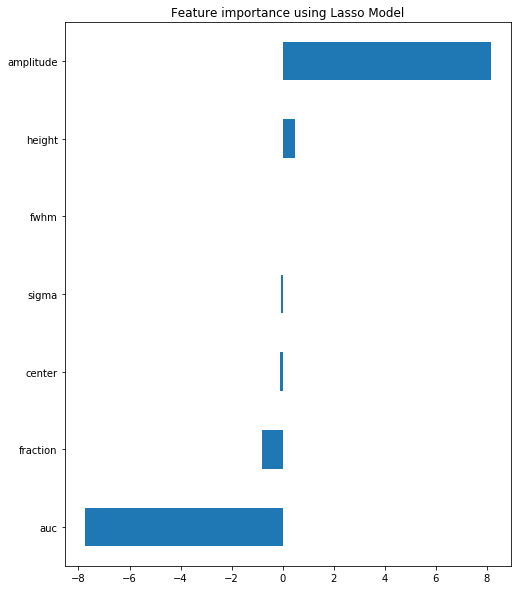

In [93]:
#LASSO 
#feature selection

# X_train_scaled  = preprocessing.normalize(X_train, norm='l2', axis=0, copy=True, return_norm=False)
# X_test_scaled  = preprocessing.normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
# If normalized is needed
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Lasso(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# What makes sense is that center should be the only one to correlate to labels due to peakidentification
# L1 loss function points to center as the only solution

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  import sys
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to

Text(0.5, 1.0, 'error vs $\\lambda$')

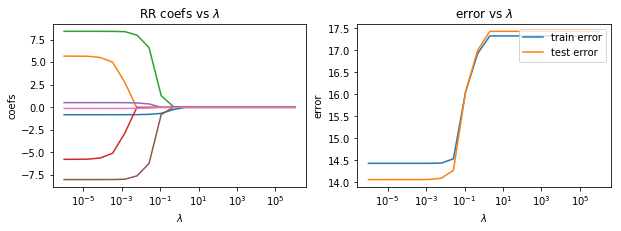

In [94]:
model=linear_model.Lasso()
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,20) # SEACH THE RANGE OF THE LAMBDA SPACE

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
plt.figure(figsize=(10,3))
plt.locator_params(nbins=5)
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
#plt.xlim(1e-4,1e0)

plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
#plt.xlim(1e-4,1e0)
#plt.ylim(0,0.5)
plt.legend(loc=1)
plt.title('error vs $\lambda$')

# Ridge Feature Selection #Didnt eliminate anything 

fraction    -0.821219
sigma       -0.045776
amplitude    8.417713
fwhm        -0.045776
height       0.520469
auc         -8.007474
center      -0.128029
dtype: float64
Lasso picked 7 variables and eliminated the other 0 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  """


Text(0.5, 1.0, 'Feature importance using Ridge Model')

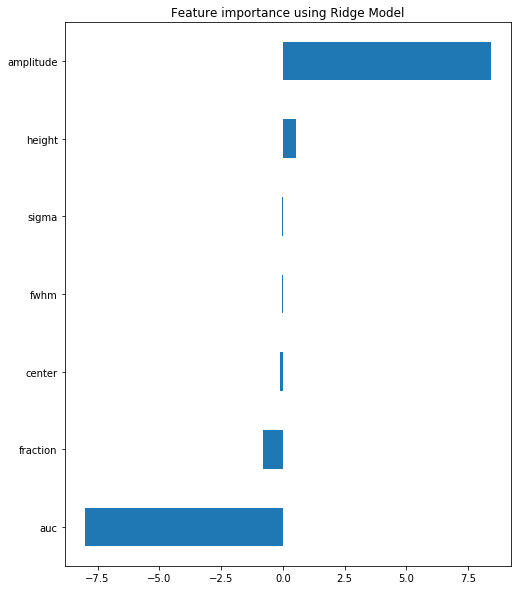

In [95]:
#Ridge
#feature selection
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Ridge(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

## 2-2 Example of searching the $\alpha$ space in RR RIDGE

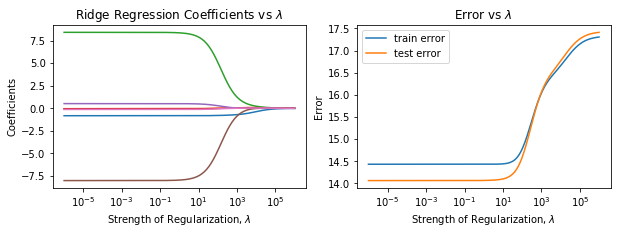

In [96]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,200) # SEACH THE RANGE OF THE LAMBDA SPACE
model=Ridge()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
# what is being plotted here? 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Error')
plt.legend(loc=0)
plt.title('Error vs $\lambda$')
plt.savefig('Ridge_feature_selection', dpi=300, bbox_inches='tight')

# Neural network

In [97]:
inputs=['fraction','sigma','amplitude','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['labelencoded']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [98]:
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statistics
import matplotlib.pyplot as plt

In [99]:
import sys
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  


Training set score: 0.161869
Test set score: 0.164826
(787,)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app



(787, 6)
Experimental Error Rate: 0.7522236340533672


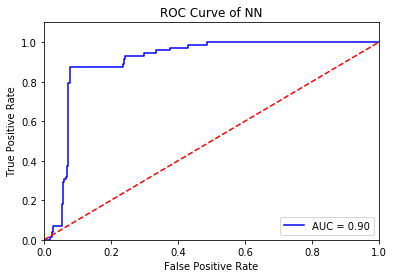

In [147]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, batch_size=10000,verbose=0, max_iter=200, validation_fraction=0.33,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))

# instantiate the model with the best known parameters
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, batch_size=10000,verbose=0, max_iter=200, validation_fraction=0.33,
                    hidden_layer_sizes=(5, 2), random_state=1)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
clf.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = clf.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
clf.fit(X_exp_normalized, y_exp)
y_scores = clf.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN')
plt.show()
# Pick hyper parameters change how fast your neaural network learns
# change the conversion of the network settings and its accuracy settings 
# The epochs limit  can be changed into a conditiional function where 
# This is sayting just run  150 epochs and stop
# THe neaural network can be inputed with certain data points for each epoch
# The history object returned by the fit call contains the information in a fitting run.

Iteration 1, loss = 4.20118226
Iteration 2, loss = 2.57018692
Iteration 3, loss = 2.53357158
Iteration 4, loss = 2.51278680
Iteration 5, loss = 2.49714396
Iteration 6, loss = 2.48457006
Iteration 7, loss = 2.47315292
Iteration 8, loss = 2.46279399
Iteration 9, loss = 2.45317958
Iteration 10, loss = 2.44466084
Iteration 11, loss = 2.43694923
Iteration 12, loss = 2.42994691
Iteration 13, loss = 2.42358498
Iteration 14, loss = 2.41764298
Iteration 15, loss = 2.41230956
Iteration 16, loss = 2.40739942
Iteration 17, loss = 2.40285585
Iteration 18, loss = 2.39879179
Iteration 19, loss = 2.39509628
Iteration 20, loss = 2.39168866
Iteration 21, loss = 2.38851387
Iteration 22, loss = 2.38555559
Iteration 23, loss = 2.38282660
Iteration 24, loss = 2.38038723
Iteration 25, loss = 2.37804191
Iteration 26, loss = 2.37602110
Iteration 27, loss = 2.37405110
Iteration 28, loss = 2.37223451
Iteration 29, loss = 2.37060856
Iteration 30, loss = 2.36906617
Iteration 31, loss = 2.36763051
Iteration 32, los

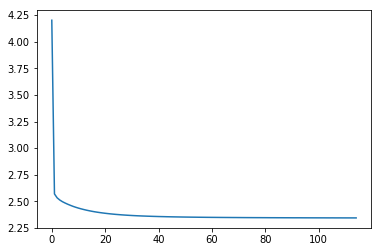

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.


Iteration 1, loss = 2.42155020
Iteration 2, loss = 2.41019787
Iteration 3, loss = 2.39370232
Iteration 4, loss = 2.37415061
Iteration 5, loss = 2.35269706
Iteration 6, loss = 2.33053577
Iteration 7, loss = 2.30806680
Iteration 8, loss = 2.28618264
Iteration 9, loss = 2.26420682
Iteration 10, loss = 2.24349317
Iteration 11, loss = 2.22329393
Iteration 12, loss = 2.20320740
Iteration 13, loss = 2.18412918
Iteration 14, loss = 2.16553654
Iteration 15, loss = 2.14688181
Iteration 16, loss = 2.12931554
Iteration 17, loss = 2.11216342
Iteration 18, loss = 2.09540019
Iteration 19, loss = 2.07922280
Iteration 20, loss = 2.06335435
Iteration 21, loss = 2.04803080
Iteration 22, loss = 2.03272644
Iteration 23, loss = 2.01807890
Iteration 24, loss = 2.00354741
Iteration 25, loss = 1.98911128
Iteration 26, loss = 1.97563293
Iteration 27, loss = 1.96211165
Iteration 28, loss = 1.94846516
Iteration 29, loss = 1.93581338
Iteration 30, loss = 1.92267154
Iteration 31, loss = 1.90988372
Iteration 32, los

Iteration 267, loss = 0.89736311
Iteration 268, loss = 0.89602337
Iteration 269, loss = 0.89466708
Iteration 270, loss = 0.89338205
Iteration 271, loss = 0.89202822
Iteration 272, loss = 0.89072200
Iteration 273, loss = 0.88953365
Iteration 274, loss = 0.88819026
Iteration 275, loss = 0.88686544
Iteration 276, loss = 0.88558346
Iteration 277, loss = 0.88438712
Iteration 278, loss = 0.88315030
Iteration 279, loss = 0.88190211
Iteration 280, loss = 0.88060136
Iteration 281, loss = 0.87939191
Iteration 282, loss = 0.87813678
Iteration 283, loss = 0.87695821
Iteration 284, loss = 0.87577057
Iteration 285, loss = 0.87451447
Iteration 286, loss = 0.87328279
Iteration 287, loss = 0.87210160
Iteration 288, loss = 0.87085851
Iteration 289, loss = 0.86971873
Iteration 290, loss = 0.86850416
Iteration 291, loss = 0.86734130
Iteration 292, loss = 0.86615412
Iteration 293, loss = 0.86496567
Iteration 294, loss = 0.86381275
Iteration 295, loss = 0.86265361
Iteration 296, loss = 0.86154551
Iteration 

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 14, loss = 2.16553654
Iteration 15, loss = 2.14688181
Iteration 16, loss = 2.12931554
Iteration 17, loss = 2.11216342
Iteration 18, loss = 2.09540019
Iteration 19, loss = 2.07922280
Iteration 20, loss = 2.06335435
Iteration 21, loss = 2.04803080
Iteration 22, loss = 2.03272644
Iteration 23, loss = 2.01807890
Iteration 24, loss = 2.00354741
Iteration 25, loss = 1.98911128
Iteration 26, loss = 1.97563293
Iteration 27, loss = 1.96211165
Iteration 28, loss = 1.94846516
Iteration 29, loss = 1.93581338
Iteration 30, loss = 1.92267154
Iteration 31, loss = 1.90988372
Iteration 32, loss = 1.89747502
Iteration 33, loss = 1.88538325
Iteration 34, loss = 1.87329704
Iteration 35, loss = 1.86137838
Iteration 36, loss = 1.84977992
Iteration 37, loss = 1.83788267
Iteration 38, loss = 1.82651723
Iteration 39, loss = 1.81489782
Iteration 40, loss = 1.80363812
Iteration 41, loss = 1.79234191
Iteration 42, loss = 1.78129702
Iteration 43, loss = 1.77018698
Iteration 44, loss = 1.75902077
Iterati

Iteration 265, loss = 0.90006951
Iteration 266, loss = 0.89871404
Iteration 267, loss = 0.89736311
Iteration 268, loss = 0.89602337
Iteration 269, loss = 0.89466708
Iteration 270, loss = 0.89338205
Iteration 271, loss = 0.89202822
Iteration 272, loss = 0.89072200
Iteration 273, loss = 0.88953365
Iteration 274, loss = 0.88819026
Iteration 275, loss = 0.88686544
Iteration 276, loss = 0.88558346
Iteration 277, loss = 0.88438712
Iteration 278, loss = 0.88315030
Iteration 279, loss = 0.88190211
Iteration 280, loss = 0.88060136
Iteration 281, loss = 0.87939191
Iteration 282, loss = 0.87813678
Iteration 283, loss = 0.87695821
Iteration 284, loss = 0.87577057
Iteration 285, loss = 0.87451447
Iteration 286, loss = 0.87328279
Iteration 287, loss = 0.87210160
Iteration 288, loss = 0.87085851
Iteration 289, loss = 0.86971873
Iteration 290, loss = 0.86850416
Iteration 291, loss = 0.86734130
Iteration 292, loss = 0.86615412
Iteration 293, loss = 0.86496567
Iteration 294, loss = 0.86381275
Iteration 

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


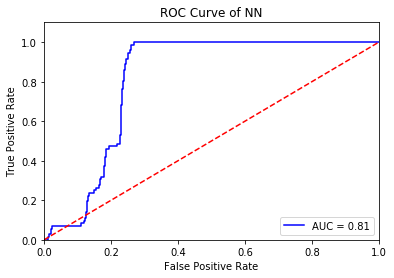

In [148]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

clf.fit(X_train, y_train)

clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
plt.plot(loss_values)
plt.show()
# instantiate the model with the best known parameters
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
clf.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = clf.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
clf.fit(X_exp_normalized, y_exp)
y_scores = clf.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN')
plt.show()

Iteration 1, loss = 1.90818431
Iteration 2, loss = 1.42084116
Iteration 3, loss = 1.23565339
Iteration 4, loss = 1.13748185
Iteration 5, loss = 1.07029015
Iteration 6, loss = 1.03048259
Iteration 7, loss = 1.00069422
Iteration 8, loss = 0.98016187
Iteration 9, loss = 0.95407368
Iteration 10, loss = 0.91511976
Training set score: 0.593309
Test set score: 0.600680


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'Loss Cost')

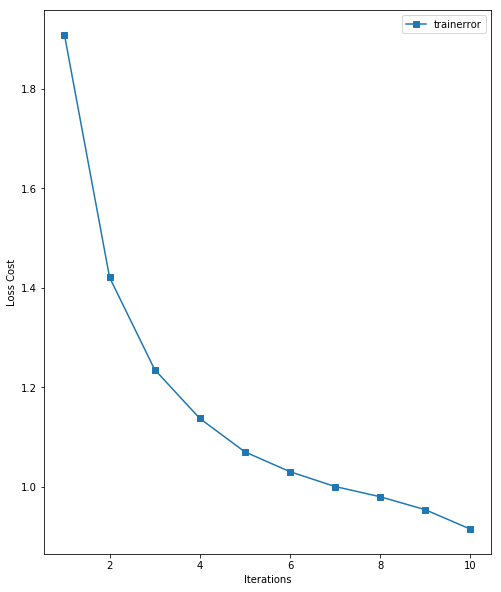

In [102]:
num = 10
clf = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=num, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

clf.fit(X_train, y_train)

ypred = clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
# plt.plot(loss_values)
# plt.show()
lossrange = np.arange(1,num+1,1)
plt.plot(lossrange,loss_values,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss Cost')



C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Training set score: 0.425597
Test set score: 0.427782


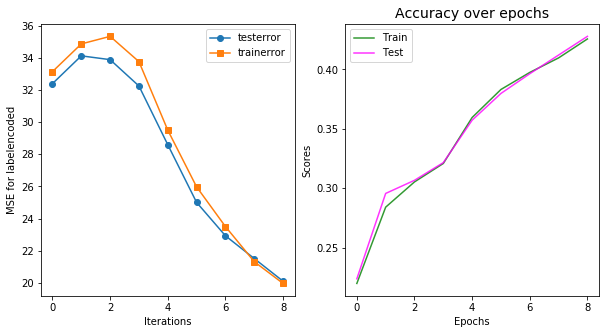

In [103]:
coefs = []
trainerror = []
testerror = []
loss_values = []
scores_train = []
scores_test = []
num = 10
lossrange = np.arange(1,num,1)
for i in lossrange:
    clf = MLPClassifier(solver='sgd',hidden_layer_sizes=(100,100), random_state=1, max_iter=i, warm_start=True)
    clf.fit(X_train,y_train)
    trainpred = clf.predict(X_train)
    testpred = clf.predict(X_test)
    coefs.append(clf.coefs_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
    loss_values.append(clf.loss_curve_)
    # SCORE TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(clf.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(trainerror,marker='o',label='testerror')
plt.plot(testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE for labelencoded')
plt.subplot(122)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc='upper left')
plt.show()

### Accuracy over epochs data

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (67) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (68) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (69) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

Training set score: 0.960064
Test set score: 0.954121


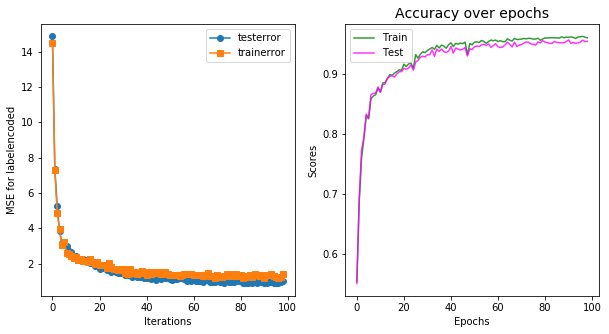

<Figure size 576x720 with 0 Axes>

In [104]:
coefs = []
trainerror = []
testerror = []
loss_values = []
scores_train = []
scores_test = []
num = 100
lossrange = np.arange(1,num,1)
for i in lossrange:
    clf = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=i, warm_start=True)
    clf.fit(X_train, y_train)
    trainpred = clf.predict(X_train)
    testpred = clf.predict(X_test)
    coefs.append(clf.coefs_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
    loss_values.append(clf.loss_curve_)
    # SCORE TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(clf.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(trainerror,marker='o',label='testerror')
plt.plot(testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE for labelencoded')
plt.subplot(122)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc='upper left')
plt.show()
plt.savefig('NN_accuracy', dpi=300, bbox_inches='tight')

# Cross Validation of NN

In [105]:
# Cross Validation
inputs=['fraction','sigma','amplitude','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1000)
# ntrain = train.shape[0]
# nval = val.shape[0]
# train = np.concatenate((train, val))

# test_fold = -1*np.ones(ntrain+nval)
# test_fold[ntrain:] = 0
# cv = PredefinedSplit(test_fold)

# # you can pass the object cv to functions such as GridSearchCV


# Kfold
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5)
X = np.array(X)
y = np.array(y)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('X_test: ', X_test)

X_test:  [[0.7183274673384545 4.380337829195924 3.2415220140280736
  0.2671145389093179 3.209203120986047 355.0]
 [0.5594965905780308 4.4658648590683425 8.22711448927372
  0.7092664460016654 8.205188796289036 587.0]
 [0.9999913699057317 4.095155587787694 1.748731821328024
  0.13592668217331078 1.7437559985227122 815.0]
 ...
 [0.028378647147297764 7.032684550062573 3.0153297926523157
  0.19955401127171063 3.0148694666544533 750.0]
 [0.5341708707401888 4.095375577815884 0.980547686522518
  0.09309931150636769 0.9790572355626709 815.0]
 [0.5040164888442815 8.414392057556011 13.59196921278916
  0.6354783550375178 13.554181128100657 860.0]]
X_test:  [[0.32740991740649905 3.2444608998061657 4.462605667718377
  0.5778912386300099 4.459527929338729 868.0]
 [0.2582738948097629 17.79495467447035 4.716255529092774
  0.11412697207586692 4.703115195283641 929.0]
 [2.486351112218621e-07 3.603342931635889 2.026284510845859
  0.2641390356530632 2.026284509811624 993.0]
 ...
 [0.9999999714570452 5.5514

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
seed = 21899

In [107]:
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(max_iter=1)
# #Define a hyper-parameter space to search. (All the values that you want to try out.)

# parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# # Note: the max_iter=100 that you defined on the initializer is not in the grid. So, that number will be constant, while the ones in the grid will be searched.

# # Run the search:

# from sklearn.model_selection import GridSearchCV

# clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3)
# clf.fit(X_train, y_train)
# # Note: the parameter n_jobs is to define how many CPU cores from your computer to use. The cv is the number of splits for cross-validation.

# # See the best results:

# # Best paramete set
# print('Best parameters found:\n', clf.best_params_)

# # All results
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# # Now you can use the clf to make new predictions. For example, check the performance on your test set.

# y_true, y_pred = y_test , clf.predict(X_test)

# from sklearn.metrics import classification_report
# print('Results on the test set:')
# print(classification_report(y_true, y_pred))










In [108]:
[coef.shape for coef in clf.coefs_]

[(6, 100), (100, 100), (100, 13)]

Iteration 1, loss = 2.76335358
Iteration 2, loss = 2.33607629
Iteration 3, loss = 2.08862252
Iteration 4, loss = 1.92422923
Iteration 5, loss = 1.81166272
Iteration 6, loss = 1.71495967
Iteration 7, loss = 1.64774880
Iteration 8, loss = 1.58526136
Iteration 9, loss = 1.53568347
Iteration 10, loss = 1.48695844
(787,)
(787, 6)
Experimental Error Rate: 0.4726810673443456
Training set score: 0.086980
Test set score: 0.098173


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: Data with input dtype object were all converted to float64 by 

Iteration 1, loss = 2.76335358
Iteration 2, loss = 2.33607629
Iteration 3, loss = 2.08862252
Iteration 4, loss = 1.92422923
Iteration 5, loss = 1.81166272
Iteration 6, loss = 1.71495967
Iteration 7, loss = 1.64774880
Iteration 8, loss = 1.58526136
Iteration 9, loss = 1.53568347
Iteration 10, loss = 1.48695844
(787,)
(787, 6)
Experimental Error Rate: 0.4726810673443456
Iteration 1, loss = 2.76335358
Iteration 2, loss = 2.33607629
Iteration 3, loss = 2.08862252
Iteration 4, loss = 1.92422923
Iteration 5, loss = 1.81166272
Iteration 6, loss = 1.71495967
Iteration 7, loss = 1.64774880
Iteration 8, loss = 1.58526136
Iteration 9, loss = 1.53568347
Iteration 10, loss = 1.48695844


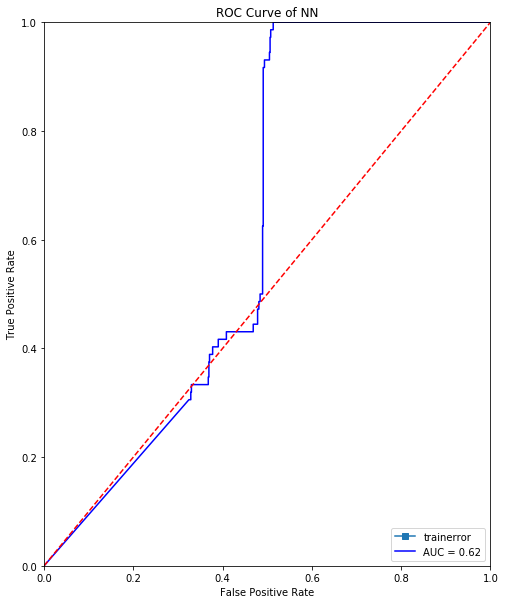

<Figure size 576x720 with 0 Axes>

In [109]:
num = 10
# instantiate the model with the best known parameters
clf = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=num, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
# Scale and Normalize
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
clf.fit(X_exp_normalized, y_exp)
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

# make a prediction for an out-of-sample observation
ypred = clf.predict(X_exp_normalized) 
rate = clf.predict(X_exp_normalized)  == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
# plt.plot(loss_values)
# plt.show()
lossrange = np.arange(1,num+1,1)
plt.plot(lossrange,loss_values,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss Cost')
# instantiate the model with the best known parameters
clf = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=num, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
clf.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = clf.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
clf.fit(X_exp_normalized, y_exp)
y_scores = clf.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN')
plt.show()
plt.savefig('NN_ROC', dpi=300, bbox_inches='tight')





# Support Vector Machines rbf

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

In [111]:
inputs=['fraction','sigma','amplitude','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [112]:
X_train_scaled  = preprocessing.normalize(X_train, norm='l2', axis=0, copy=True, return_norm=False)
X_test_scaled  = preprocessing.normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
#Support Vector Machine 
#-->Chosen under the assumption that eventually more batteries will be added with highly dimensional features that 
# can not be seperated by simple linear or logistic regression models 

In [113]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid',gamma ='scale')
svclassifier.fit(X_train, y_train) 
trainpred=svclassifier.predict(X_train_scaled ) #predict train data 
testpred=svclassifier.predict(X_test_scaled )
print("Train error",mean_squared_error(y_train,trainpred))
print("Test error",mean_squared_error(y_test,testpred))
print("Training set score: %f" % svclassifier.score(X_train, y_train))
print("Test set score: %f" % svclassifier.score(X_test, y_test))
y_pred = svclassifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train error 44.83122676579926
Test error 45.10110450297366
Training set score: 0.207541
Test set score: 0.203059
[[  0   0   0   0   0 224   0   0   8   0   0   0   0]
 [  0  65   0   0 107   0   0   0  33   0   0   0   5]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  50]
 [  0   0   0   0   5  62   0   0   4   0   0   0 246]
 [  0   0   0   0 103  97   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 104   0   0   0   0]
 [  0   0   0  59   0   0   0   0  29   0   0   0 122]
 [  0   0   0   0   0   0   0   0 101   0   0 106 181]
 [  0   0   0   0   0   0   0   0 105   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  25]
 [  0   0   0   0   0   0   0   0  17   0   0 210 104]
 [  0   0   0 107  74   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       232
           1       1.00      0.31      0.47       210
        

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [114]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
svclassifier = SVC(kernel='rbf',gamma ='scale')
scaler = StandardScaler().fit(X_exp)
X_exp_scaled  = preprocessing.normalize(X_exp, norm='l2', axis=0, copy=True, return_norm=False)
svclassifier.fit(X_exp_scaled,y_exp)
y_scores = svclassifier.predict_proba(X_exp_scaled)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


AttributeError: predict_proba is not available when  probability=False

# KNN

In [115]:
inputs=['fraction','sigma','amplitude','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['labelencoded']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [116]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
# this is a new library you haven't seen before, what do you think it does? 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [117]:
KNNmodel = KNeighborsClassifier(n_neighbors=3) # initialize the model by choosing the number of neighbors (flexibility of model in this case)
# KNNmodel = KNeighborsClassifier(n_neighbors=1) minimum neighbord minimum predicted error
# remember the parabolic function of training vs. test set there is limit to the flexilibility vs. errors of the model
# Expected n_neighbors <= n_samples,  but n_samples = 15, n_neighbors = 20
# thus KNNmodel = KNeighborsClassifier(n_neighbors=15) is max

In [118]:
KNNmodel.fit(X_train, y_train) # feed the model some training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [119]:
rate = KNNmodel.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = KNNmodel.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: 0.9993627190653213
Testing Error Rate: 0.9966015293118097


In [120]:
k_range = range(1,20)
# empty list to store scores
k_scores = []
trainerror = []
testerror = []
train_rmse_val = []
test_rmse_val = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    KNNmodel = KNeighborsClassifier(n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    trainerror.append(mean_squared_error(y_train,KNNmodel.predict(X_train)))
    testerror.append(mean_squared_error(y_test,KNNmodel.predict(X_test)))
    train_rmse_val.append(np.sqrt(mean_squared_error(y_train,KNNmodel.predict(X_train)))) #store rmse values
#     print('Train RMSE value for k= ' , k , 'is:', trainerror)
    test_rmse_val.append(np.sqrt(mean_squared_error(y_train,KNNmodel.predict(X_train)))) #store rmse values
#     print('Test RMSE value for k= ' , k , 'is:', testerror)
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

Text(0, 0.5, 'MSE for $labelencoded$')

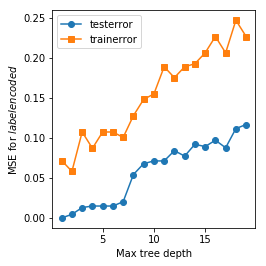

In [121]:
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(k_range,trainerror,marker='o',label='testerror')
plt.plot(k_range,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')

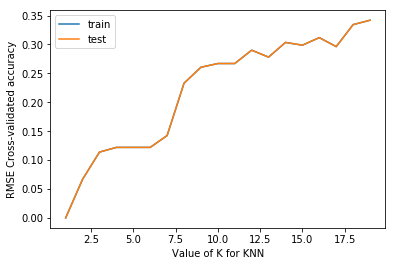

In [122]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, train_rmse_val,label='train')
plt.plot(k_range, test_rmse_val,label='test')
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE Cross-validated accuracy')
plt.legend()

In [123]:
# instantiate the model with the best known parameters
KNNmodel = KNeighborsClassifier(n_neighbors=2)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
KNNmodel.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = KNNmodel.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

(787,)
(787, 6)
Experimental Error Rate: 0.9783989834815756


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import svm

In [125]:
# inputs=['fraction','sigma','amplitude','height','center']
# X_train = cal[inputs]
# y_train = cal['labelencoded']
# X_test = dat[inputs]
# y_test = dat['labelencoded']

# KNN CROSS VALIDATION FROM https://www.ritchieng.com/machine-learning-cross-validation/ and lectures 

In [126]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)

# 60 -20 -20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1000)
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X_val, y_val, cv=10, scoring='accuracy')
print(scores)

[0.98760331 0.9875     0.98319328 0.98728814 0.99148936 0.99141631
 1.         0.98712446 0.98283262 0.99134199]


In [127]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.988978946229133


In [128]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 50)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_val, y_val, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

[0.9961839431997328, 0.994916003594987, 0.9919417217850043, 0.9902429533027565, 0.988978946229133, 0.9864175736492458, 0.9851572245847768, 0.9830221500605079, 0.9813050422428873, 0.9787643908281949, 0.9753613101430814, 0.972365970059253, 0.9715364459689766, 0.9706688512798431, 0.9694349639226058, 0.9677286141780828, 0.9673029271259775, 0.9656095263947057, 0.9660387688184514, 0.9643613635097807, 0.965221339019589, 0.9631004860519278, 0.9635137091924235, 0.9618146722561118, 0.9626480634638345, 0.9609367810022065, 0.9600943733123544, 0.960511039979021, 0.9596688413974608, 0.9600785631373963, 0.9604721089854877, 0.960497150125559, 0.958375927537702, 0.9583814465225803, 0.9579485460896799, 0.9596599836885197, 0.9579557594704751, 0.95539676872041, 0.9549660949801198, 0.9558296691533104, 0.9554021325680765, 0.9507648291866037, 0.9495008274876723, 0.9456378724900378, 0.9443682885571464, 0.9426516422478517, 0.9413728905989283, 0.9405219819063528, 0.939681645771899]


{'n_neighbors': 2}

In [129]:
# in essence, this is basically running the k-fold cross-validation method 30 times because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 49
Max of list 0.9961839431997328


Text(0, 0.5, 'Cross-validated accuracy')

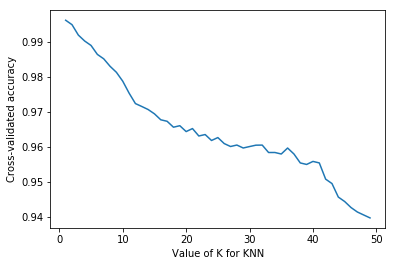

In [130]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [131]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X_val, y_val, cv=10, scoring='accuracy').mean())

0.994916003594987


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  


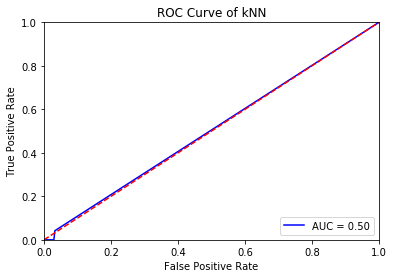

<Figure size 432x288 with 0 Axes>

In [132]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
knn = KNeighborsClassifier(n_neighbors=2)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
knn.fit(X_exp_normalized,y_exp)
y_scores = knn.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()
plt.savefig('KNN_ROC', dpi=300, bbox_inches='tight')

# Decision Trees # specifically to see if below descriptors can find and predict Area under curve # Strings needed to be 

In [133]:
inputs=['fraction','sigma','amplitude','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['labelencoded']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [134]:
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [135]:
DT=tree.DecisionTreeClassifier(max_depth=3)
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
import os
#conda install -c conda-forge pydotplus=2.0.2
# http://www.webgraphviz.com
import pydotplus 

In [137]:
with open("basic_tree.dot", 'w') as f:
    f = tree.export_graphviz(DT, out_file=f)

In [138]:
#http://www.webgraphviz.com
# os.unlink('basic_tree.dot')

dot_data = tree.export_graphviz(DT, out_file=None,feature_names=inputs)
graph = pydotplus.graph_from_dot_data(dot_data) 
#graph.write_pdf("basic_tree.pdf") 

In [139]:
os.environ["PATH"] += os.pathsep + 'C:/Users/koolk/Anaconda3/Library/bin/graphviz/'

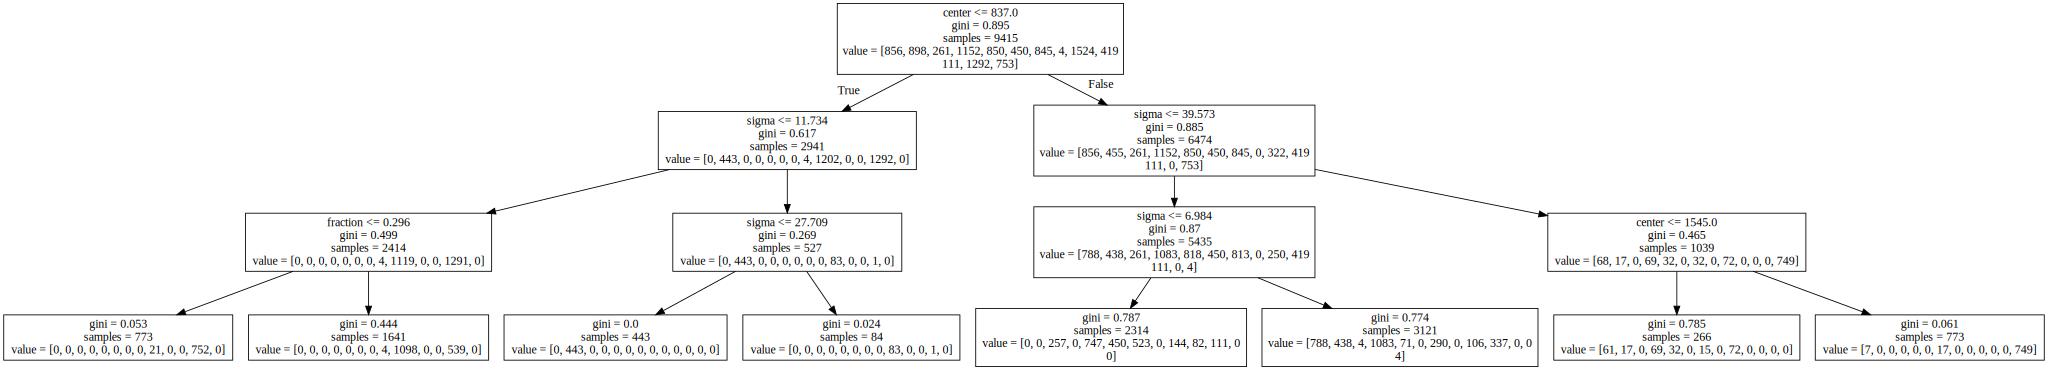

In [140]:
from IPython.display import SVG, display
display(SVG(graph.create_svg()))

In [141]:
model.fit(X_train,y_train)
rate = DT.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = DT.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: 0.533935209771641
Testing Error Rate: 0.5339847068819031


13
Train error 6.525225703664366
Test error 6.469838572642311


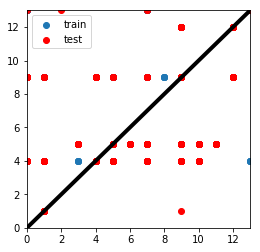

In [142]:
# make predictions on test and train set 
trainpred=DT.predict(X_train)
testpred=DT.predict(X_test)


maxlimit =testpred.max()
print(maxlimit)
#parity plot 
plt.figure(figsize=(4,4))
plt.xlim([0,maxlimit]);
plt.ylim([0,maxlimit]);
plt.scatter(y_train,trainpred, label ='train')
plt.scatter(y_test,testpred,color='r', label = 'test')
plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
plt.legend()
#calculate the test and train error
print("Train error",mean_squared_error(y_train,trainpred))
print("Test error",mean_squared_error(y_test,testpred))

In [143]:
trainerror = []
testerror = []

trees = np.arange(1,20,1)
#model=tree.DecisionTreeRegressor()

# loop over lambda values (strength of regularization)
for t in trees:
    model=tree.DecisionTreeClassifier(max_depth=t)
    model.fit(X_train,y_train)
    trainerror.append(mean_squared_error(y_train,model.predict(X_train)))
    testerror.append(mean_squared_error(y_test,model.predict(X_test)))

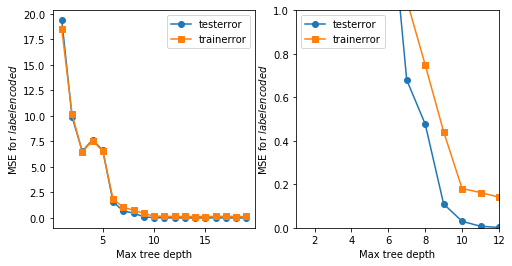

In [144]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')
plt.subplot(122)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.ylim((0,1))
plt.xlim((1,12))
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')
plt.savefig('DT_MSE', dpi=300, bbox_inches='tight')

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'max_depth':[2,3,4,5,6,7,8,9]}

DTC = tree.DecisionTreeClassifier()

model = GridSearchCV(DTC, params, cv=4)
model.fit(X_train,y_train)
model.best_params_

{'max_depth': 9}

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


(787,)
(787, 6)
Experimental Error Rate: 0.9949174078780177


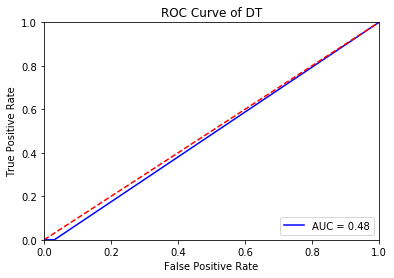

<Figure size 432x288 with 0 Axes>

In [146]:
# instantiate the model with the best known parameters
DT=tree.DecisionTreeClassifier(max_depth=9)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
DT.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = DT.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
DT=tree.DecisionTreeClassifier(max_depth=9)
DT.fit(X_exp_normalized, y_exp)
y_scores = DT.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()
plt.savefig('DT_ROC', dpi=300, bbox_inches='tight')